<a href="https://colab.research.google.com/github/alfafimel/IPWK2-CORE/blob/master/EDA_Financial_inclusion_in_Kenya%2C_Rwanda%2C_Tanzania_and_Uganda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis.

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Financial Inclusion: Identify how we can predict which individuals are most likely to have or use a bank account across Kenya, Rwanda, Tanzania, and Uganda.



### b) Defining the Metric for Success



   the objectives for this data include:


1.   indentifying which individuals are more likely to use the bank
2.   their age groups



### c) Understanding the context 

to solve the challenge of financial inclusion, in several regions across east Africa, i have been assigned to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.



### d) Recording the Experimental Design

1. reading in the datasets
2. checking the data for duplicates and missinng data
3. dropping of duplicates and removal filling in of missing data values with zero
4. Finding  and dealing with outliers, anomalies, and missing data within the dataset.
5. Performing of univariate, bivariate and multivariate analysis recording of observations.
6. Implementing the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
7. Challenge your solution by providing insights on how you can make improvements.

## 2. Reading the Data

In [319]:
# Loading the Data from the source
# dataset url = http://bit.ly/FinancialDataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
##

url = 'http://bit.ly/FinancialDataset'
df = pd.read_csv(url)
df

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


## 3. Checking the Data

In [4]:
# Determining the no. of records in the dataset
df.shape

(23524, 13)

In [8]:
# running str()
str(df)

'      country  year  ...              Level of Educuation                Type of Job\n0       Kenya  2018  ...              Secondary education              Self employed\n1       Kenya  2018  ...              No formal education       Government Dependent\n2       Kenya  2018  ...  Vocational/Specialised training              Self employed\n3       Kenya  2018  ...                Primary education  Formally employed Private\n4       Kenya  2018  ...                Primary education        Informally employed\n...       ...   ...  ...                              ...                        ...\n23519  Uganda  2018  ...              No formal education               Other Income\n23520  Uganda  2018  ...              Secondary education               Other Income\n23521  Uganda  2018  ...                Primary education               Other Income\n23522  Uganda  2018  ...              Secondary education              Self employed\n23523  Uganda  2018  ...              Secondary educa

In [5]:
# Previewing the top of the dataset
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
# Previewing the bottom of the dataset
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [7]:
# Checking whether each column has an appropriate datatype
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


## 4. Tidying the Dataset

In [322]:
# Checking for Outliers
outliers=[]

def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

detect_outlier(df['household_size'])

[11.0,
 12.0,
 16.0,
 11.0,
 12.0,
 11.0,
 11.0,
 16.0,
 11.0,
 11.0,
 15.0,
 13.0,
 11.0,
 11.0,
 11.0,
 13.0,
 12.0,
 12.0,
 12.0,
 12.0,
 11.0,
 11.0,
 11.0,
 13.0,
 13.0,
 12.0,
 12.0,
 12.0,
 11.0,
 12.0,
 13.0,
 11.0,
 11.0,
 12.0,
 11.0,
 12.0,
 13.0,
 11.0,
 11.0,
 11.0,
 11.0,
 14.0,
 21.0,
 11.0,
 14.0,
 12.0,
 15.0,
 11.0,
 15.0,
 15.0,
 13.0,
 11.0,
 11.0,
 13.0,
 12.0,
 13.0,
 11.0,
 11.0,
 11.0,
 13.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 12.0,
 11.0,
 11.0,
 11.0,
 12.0,
 11.0,
 12.0,
 12.0,
 12.0,
 13.0,
 11.0,
 11.0,
 12.0,
 11.0,
 12.0,
 11.0,
 11.0,
 12.0,
 11.0,
 11.0,
 11.0,
 12.0,
 13.0,
 14.0,
 12.0,
 12.0,
 13.0,
 13.0,
 12.0,
 12.0,
 13.0,
 12.0,
 11.0,
 15.0,
 12.0,
 11.0,
 11.0,
 12.0,
 11.0,
 13.0,
 11.0,
 11.0,
 12.0,
 12.0,
 18.0,
 12.0,
 12.0,
 12.0,
 14.0,
 12.0,
 17.0,
 11.0,
 12.0,
 12.0,
 13.0,
 13.0,
 12.0,
 12.0,
 13.0,
 12.0,
 11.0,
 12.0,
 11.0,
 11.0,
 20.0,
 12.0,
 14.0,
 15.0,
 12.0,
 12.0,
 15.0,
 11.0,
 11.0,
 12.0,
 12.0,
 12.0,
 12.0,

In [323]:
outliers=[]

def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

detect_outlier(df['Respondent Age'])

[95.0,
 95.0,
 95.0,
 93.0,
 90.0,
 89.0,
 95.0,
 94.0,
 95.0,
 93.0,
 90.0,
 92.0,
 92.0,
 90.0,
 90.0,
 90.0,
 91.0,
 93.0,
 95.0,
 90.0,
 89.0,
 89.0,
 95.0,
 90.0,
 89.0,
 89.0,
 89.0,
 90.0,
 95.0,
 93.0,
 92.0,
 95.0,
 94.0,
 92.0,
 95.0,
 90.0,
 95.0,
 95.0,
 89.0,
 95.0,
 98.0,
 95.0,
 97.0,
 92.0,
 89.0,
 92.0,
 89.0,
 96.0,
 89.0,
 99.0,
 89.0,
 94.0,
 91.0,
 91.0,
 90.0,
 89.0,
 89.0,
 90.0,
 95.0,
 89.0,
 90.0,
 96.0,
 100.0,
 90.0,
 90.0,
 89.0,
 98.0,
 91.0,
 92.0,
 95.0,
 89.0,
 94.0,
 99.0,
 90.0,
 90.0,
 90.0,
 90.0,
 90.0,
 100.0,
 95.0,
 91.0,
 90.0,
 95.0,
 94.0,
 90.0,
 98.0,
 98.0,
 100.0,
 100.0,
 90.0,
 90.0,
 100.0,
 90.0,
 90.0,
 96.0,
 90.0,
 90.0,
 98.0,
 95.0,
 98.0,
 90.0]

In [320]:
# quantiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
# ---
# 
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(df1.shape)

# Printing the shape of our old dataset
# ---
#
print(df.shape)

(22903, 13)
(23524, 13)


In [100]:
# More data cleaning procedures
df1.drop_duplicates()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23518,Uganda,2018,uniqueid_2111,No,Rural,Yes,NaN,20.0,Female,Child,Single/Never Married,Primary education,No Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income


In [101]:
# Identifying the Missing Data
df1.isnull().values.any()

True

In [102]:
# counting missing values in ech column
df1.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            27
Respondent Age            33
gender_of_respondent      33
The relathip with head     4
marital_status            31
Level of Educuation       29
Type of Job               30
dtype: int64

In [103]:
# Dealing with the Missing Data
df1.dropna()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23512,Uganda,2018,uniqueid_2102,No,Rural,No,2.0,57.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income


In [ ]:
# drop all duplicates
df1.drop_duplicates(inplace=True)

In [ ]:
# drop columns
to_drop = ['uniqueid','The relathip with head','marital_status','year']
df1.drop(to_drop, axis=1, inplace=True)

In [158]:
df1.columns

Index(['country', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'Level of Educuation', 'Type of Job'],
      dtype='object')

## 5. **Exploratory Analysis** 

In [288]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22903 entries, 0 to 23522
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   household_size  22876 non-null  float64
 1   Respondent Age  22870 non-null  float64
dtypes: float64(2)
memory usage: 1.1 MB


#### **Univariate analysis**
---






***##Measures of Central tendency***

In [140]:
#finding the mean age
df1['Respondent Age'].mean()

38.34508089199825

In [141]:
#finding the median age
df1['Respondent Age'].median()

35.0

In [142]:
# finding the modal age
df1['Respondent Age'].mode()

0    30.0
dtype: float64

In [111]:
#finding the mean household size
df1['household_size'].mean()

3.573395698548697

In [112]:
# finding the median household size
df1['household_size'].median()

3.0

In [113]:
# finding the modal household size
df1['household_size'].mode()

0    2.0
dtype: float64

***##Measures of Dispersion***

In [114]:
# standard deviation of household sizes
df1['household_size'].std()

2.07978318144993

In [115]:
# variance of household sizes
df1['household_size'].var()

4.325498081841992

In [143]:
# standard deviation of ages
df1['Respondent Age'].std()

15.804022763001404

In [144]:
# variance of ages
df1['Respondent Age'].var()

249.76713549346655

***##Quantiles***

In [118]:
# finding quantiles of household sizes
df1['household_size'].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [119]:
# finding quantiles of ages
df1['Respondent Age'].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    48.0
Name: Respondent Age, dtype: float64

***##skewness***

In [120]:
df1['household_size'].skew()

0.6107328357162268

In [122]:
df1['Respondent Age'].skew()

0.7409754960713362

***##kurtosis***

In [123]:
df1['Respondent Age'].kurt()

-0.23634544791914935

In [124]:
df1['household_size'].kurt()

-0.49930440433763623

In [125]:
## summary startistics
df1['household_size'].describe()

count    22876.000000
mean         3.573396
std          2.079783
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: household_size, dtype: float64

In [126]:
df1['Respondent Age'].describe()

count    22870.000000
mean        38.345081
std         15.804023
min         16.000000
25%         26.000000
50%         35.000000
75%         48.000000
max         83.000000
Name: Respondent Age, dtype: float64

***##visualization techniques***

Ploting the univariate summaries and recording our observations

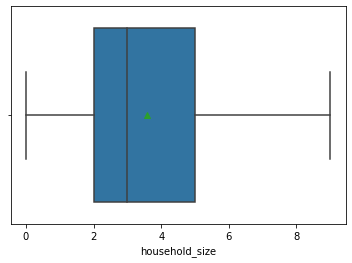

In [127]:
## boxplot
sns.boxplot(df1['household_size'], showmeans=True)

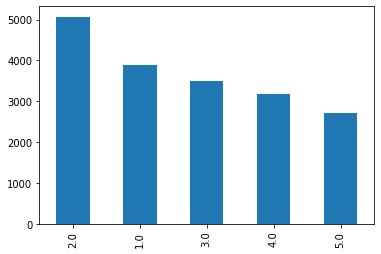

In [137]:
df1['household_size'].value_counts().head().plot.bar()

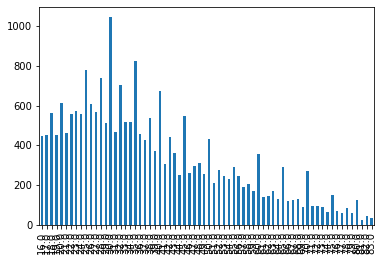

In [175]:
df1['Respondent Age'].value_counts().sort_index().plot.bar()

 Recommendations


> While from the data there is no assurity that the household size detemined whether or not individuals had bank accounts across Kenya, Rwanda, Tanzania, and Uganda, it is clear that most of the older individuals had bank accounts.
i would recommend that children and the youth be educated on the importance of bank accounts.






#### **Bivariate analysis**


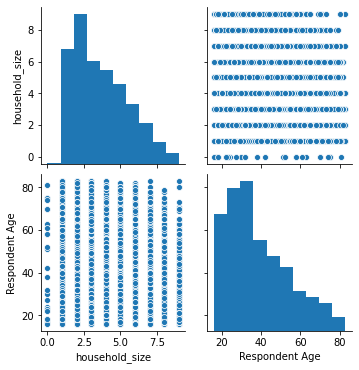

In [180]:
# Ploting the bivariate summaries and recording our observations
# scatterplot
sns.pairplot(df1)
plt.show()

In [187]:
# Calculating the pearson coefficient
pearson_coeff = df1["Respondent Age"].corr(df1["household_size"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = df1["Respondent Age"].corr(df1["household_size"]) 
print(coeff)

-0.10623942590329913
-0.10623942590329913


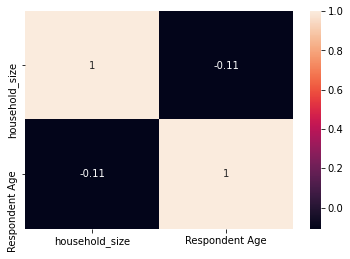

In [179]:
# heatmap
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [181]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22903 entries, 0 to 23522
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               22889 non-null  object 
 1   Has a Bank account    22867 non-null  object 
 2   Type of Location      22888 non-null  object 
 3   Cell Phone Access     22892 non-null  object 
 4   household_size        22876 non-null  float64
 5   Respondent Age        22870 non-null  float64
 6   gender_of_respondent  22870 non-null  object 
 7   Level of Educuation   22874 non-null  object 
 8   Type of Job           22873 non-null  object 
dtypes: float64(2), object(7)
memory usage: 2.4+ MB


#### **Multivariate analysis**

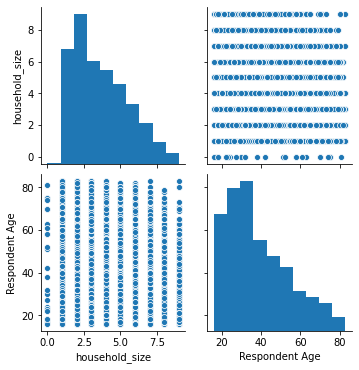

In [318]:
sns.pairplot(df1)
plt.show()

## 7. Implementing the Solution

**Data Reduction Techniques**




### 1. Principal component analysis



In [201]:
df1.head()

,country,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
0,Kenya,Yes,Rural,Yes,3.0,24.0,Female,Secondary education,Self employed
1,Kenya,No,Rural,No,5.0,70.0,Female,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5.0,26.0,Male,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,5.0,34.0,Female,Primary education,Formally employed Private
4,Kenya,No,Urban,No,8.0,26.0,Male,Primary education,Informally employed


In [204]:
df1.describe()

,household_size,Respondent Age
count,22876.000000,22870.000000
mean,3.573396,38.345081
std,2.079783,15.804023
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,48.000000
max,9.000000,83.000000


In [216]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1[['household_size', 'Respondent Age']])
scaled_data = scaler.transform(df1[['household_size', 'Respondent Age']])

In [217]:
scaled_data = pd.DataFrame(scaled_data)

In [222]:
df2 = scaled_data.fillna(0)
df2.head()

,0,1
0,-0.275706,-0.907705
1,0.685954,2.003010
2,0.685954,-0.781152
3,0.685954,-0.274941
4,2.128444,-0.781152


In [223]:
from sklearn.decomposition import PCA
logmodel = PCA(n_components=2)
logmodel.fit(df2)
pca_x = logmodel.transform(df2)

In [224]:
df2.shape

(22903, 2)

In [225]:
pca_x.shape

(22903, 2)

In [226]:
df3 = pd.DataFrame(logmodel.components_, columns = ['household_size', 'Respondent Age'])

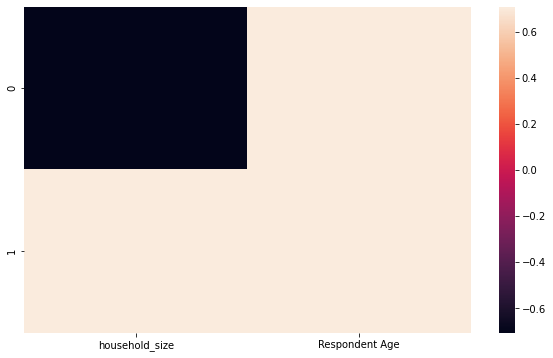

In [227]:
plt.figure(figsize=(10,6))
sns.heatmap(df3)

Text(0.5, 0, 'First Principle Component ')

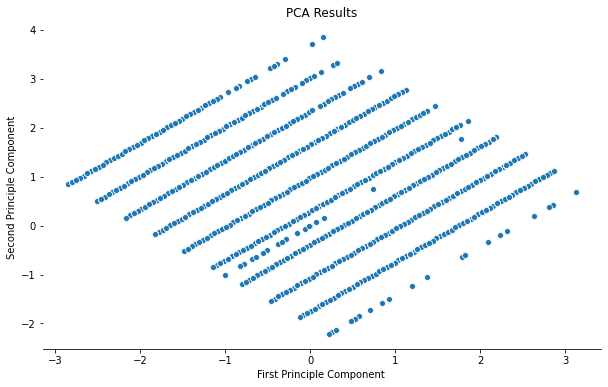

In [228]:
plt.figure(figsize=(10,6))
ty=sns.scatterplot(pca_x[:,0], pca_x[:,1])
sns.despine(left=True)
ty.set_title('PCA Results')
ty.set_ylabel('Second Principle Component ')
ty.set_xlabel('First Principle Component ')

In [229]:
pca_x

array([[-0.44637391, -0.83707398],
       [ 0.93012387,  1.90195961],
       [-1.03735907, -0.06795658],
       ...,
       [ 0.02798076, -1.04254939],
       [-0.99264355, -0.02318575],
       [-1.53891319,  0.79070247]])


### 2. Factor analysis

In [233]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22903 entries, 0 to 23522
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               22889 non-null  object 
 1   Has a Bank account    22867 non-null  object 
 2   Type of Location      22888 non-null  object 
 3   Cell Phone Access     22892 non-null  object 
 4   household_size        22876 non-null  float64
 5   Respondent Age        22870 non-null  float64
 6   gender_of_respondent  22870 non-null  object 
 7   Level of Educuation   22874 non-null  object 
 8   Type of Job           22873 non-null  object 
dtypes: float64(2), object(7)
memory usage: 2.4+ MB


In [234]:
df1.head()

,country,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
0,Kenya,Yes,Rural,Yes,3.0,24.0,Female,Secondary education,Self employed
1,Kenya,No,Rural,No,5.0,70.0,Female,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5.0,26.0,Male,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,5.0,34.0,Female,Primary education,Formally employed Private
4,Kenya,No,Urban,No,8.0,26.0,Male,Primary education,Informally employed


In [235]:
df1.columns

Index(['country', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'Level of Educuation', 'Type of Job'],
      dtype='object')

In [ ]:
# drop columns
to_drop = ['country','Has a Bank account','Type of Location','Cell Phone Access','gender_of_respondent','Level of Educuation','Type of Job']
df1.drop(to_drop, axis=1, inplace=True)

In [241]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22903 entries, 0 to 23522
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   household_size  22876 non-null  float64
 1   Respondent Age  22870 non-null  float64
dtypes: float64(2)
memory usage: 1.1 MB


In [242]:
df1.head()

,household_size,Respondent Age
0,3.0,24.0
1,5.0,70.0
2,5.0,26.0
3,5.0,34.0
4,8.0,26.0


In [247]:
import tensorflow as tf

In [250]:
# installing factor analyser
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df1)
chi_square_value, p_value

(259.94346324018227, 8.860633420399555e-59)

In [256]:
from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis

In [270]:
df4 = df1.fillna(0)

In [275]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(df4)
kmo_model

0.4999999999999979

In [282]:
from sklearn.datasets import load_iris

In [284]:
fa = FactorAnalysis()
fa.fit(df4, 25)


FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=None,
               noise_variance_init=None, random_state=0,
               svd_method='randomized', tol=0.01)

In [ ]:
# Checking the Eigenvalues
ev,v = fa.get_eigenvalues()
ev

In [ ]:
fa = FactorAnalysis()
fa.analysis(df, 6, rotation="varimax")
fa.loadings


### 3. Discriminant analysis

In [289]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from tqdm import tqdm_notebook

import warnings
warnings.filterwarnings('ignore')

In [291]:
df4.shape

(22903, 2)

In [307]:
X = df4.iloc[:, 0:4].values
y = df4.iloc[:2, ].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [309]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y)
X_test = lda.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [315]:
df4.shape

(22903, 2)

In [ ]:
# Reviewing the Solution 
N = 22903
N <- nrow(df)
idx <- sample(N, N, replace = TRUE)
df4 <- df[idx, ]

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?